# WindyGridWorld

## Non-Evaluables Practical Exercices

This is a non-evaluable practical exercise, but it is recommended that students complete it fully and individually, since it is an important part of the learning process.

The solution will be available, although it is not recommended that students consult the solution until they have completed the exercise.

## 1. Defining the base environment

In this activity, we are going to implement an environment based on [Gymnasium](https://gymnasium.farama.org/) API. 

<u>Questions</u>:
1. **Create an environment** with the following rules:
- Grid size _16 x 12_
- Starting position: [0,0]
- Final (goal) posistion: [11,15]
- Allowed actions: `0` up, `1` right, `2` down, and `3` left
- Reward: -1 for each movement
2. Implement an agent that follows a **random policy** and test its success.
3. Implement an agent that follows the **optimal policy** and test its success.

**Notes**:
- Use the **class inheritance** from `gym.Env`.

The environment looks like the following example:

<p style="text-align:center;">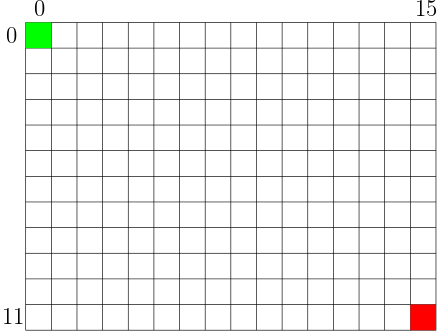</p>

The class that implements the new environment must fulfil the **following interface**:

In [1]:
import gymnasium as gym


class WindyGridWorldEnv(gym.Env):
    def __init__(self):
        pass
    
    def step(self, action):
        pass
    
    def reset(self):
        pass

## 2. Adding restrictions

Suppose there is some wind in the center cells of the grid. Specifically,
- Wind blowing with force +1 upwards in columns 6, 7, 10 and 11.
- Wind blowing with force +2 upwards in columns 8 and 9.

This means that when you land on one of these cells, your position moves 1 or 2 cells up.

<u>Questions</u>:
1. **Create an extension of the previous environment** to incorporate this specific behaviour.
2. Implement an agent that follows the **optimal policy** and test its success.


<p style="text-align:center;">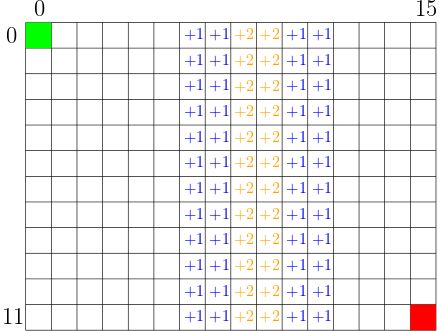</p>

<div class="alert alert-block alert-danger">
<strong>Solution</strong>
</div>

### 1. Defining the base environment

In [2]:
import gymnasium as gym
from gymnasium import spaces

class WindyGridWorldEnv(gym.Env):
    def __init__(self):
        self.height = 12
        self.width = 16
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Tuple((
                spaces.Discrete(self.height),
                spaces.Discrete(self.width)
                ))
        self.moves = {
                0: (-1, 0),  # up
                1: (0, 1),   # right
                2: (1, 0),   # down
                3: (0, -1),  # left
                }

        # begin in start state
        self.reset()

    def step(self, action):
        x, y = self.moves[action]
        self.S = self.S[0] + x, self.S[1] + y

        self.S = max(0, self.S[0]), max(0, self.S[1])
        self.S = (min(self.S[0], self.height - 1),
                  min(self.S[1], self.width - 1))

        if self.S == (self.height - 1, self.width - 1):
            return self.S, -1, True, False, {}
        else:
            return self.S, -1, False, False, {}

    def reset(self):
        self.S = (0, 0)
        return self.S

In [3]:
env = WindyGridWorldEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))

Action space is Discrete(4) 
Observation space is Tuple(Discrete(12), Discrete(16)) 


In [4]:
# Initialize the environment
obs = env.reset()
t, total_reward, done = 0, 0, False
max_iter = 100

print("Obs initial: {} ".format(obs))

while t < max_iter:
    # Choose a random action (this is the agent implementation)
    action = env.action_space.sample()
    
    # Execute the action and wait for the response from the environment
    new_obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    
    # Print
    print("Action: {} -> Obs: {} and reward: {}".format(action, new_obs, reward))
    
    # Update variables
    obs = new_obs
    total_reward += reward
    t += 1
    
    if done:
        break
    
print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
env.close()

Obs initial: (0, 0) 
Action: 3 -> Obs: (0, 0) and reward: -1
Action: 0 -> Obs: (0, 0) and reward: -1
Action: 1 -> Obs: (0, 1) and reward: -1
Action: 0 -> Obs: (0, 1) and reward: -1
Action: 0 -> Obs: (0, 1) and reward: -1
Action: 0 -> Obs: (0, 1) and reward: -1
Action: 1 -> Obs: (0, 2) and reward: -1
Action: 0 -> Obs: (0, 2) and reward: -1
Action: 2 -> Obs: (1, 2) and reward: -1
Action: 2 -> Obs: (2, 2) and reward: -1
Action: 2 -> Obs: (3, 2) and reward: -1
Action: 1 -> Obs: (3, 3) and reward: -1
Action: 0 -> Obs: (2, 3) and reward: -1
Action: 0 -> Obs: (1, 3) and reward: -1
Action: 1 -> Obs: (1, 4) and reward: -1
Action: 1 -> Obs: (1, 5) and reward: -1
Action: 2 -> Obs: (2, 5) and reward: -1
Action: 0 -> Obs: (1, 5) and reward: -1
Action: 0 -> Obs: (0, 5) and reward: -1
Action: 3 -> Obs: (0, 4) and reward: -1
Action: 0 -> Obs: (0, 4) and reward: -1
Action: 2 -> Obs: (1, 4) and reward: -1
Action: 3 -> Obs: (1, 3) and reward: -1
Action: 0 -> Obs: (0, 3) and reward: -1
Action: 1 -> Obs: (

In [5]:
num_episodes = 1000
num_success = 0
max_iter = 100

env = WindyGridWorldEnv()

for episode in range(num_episodes):
    # Environment reset
    obs, info = env.reset()
    t, done = 0, False
    
    while t < max_iter:
        # Choose a random action (this is the agent implementation)
        action = env.action_space.sample()

        # Execute the action and wait for the response from the environment
        new_obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Update variables
        obs = new_obs
        total_reward += reward
        t += 1

        if done:
            num_success += 1
            break
            
success_rate = num_success * 100 / num_episodes
print("{} successes in {} episodes: {} % of success".format(num_success, num_episodes, success_rate))

5 successes in 1000 episodes: 0.5 % of success


### 2. Adding restrictions

In [6]:
import gymnasium as gym
from gymnasium import spaces

class WindyGridWorldEnv(gym.Env):
    def __init__(self):
        self.height = 12
        self.width = 16
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Tuple((
                spaces.Discrete(self.height),
                spaces.Discrete(self.width)
                ))
        self.moves = {
                0: (-1, 0),  # up
                1: (0, 1),   # right
                2: (1, 0),   # down
                3: (0, -1),  # left
                }

        # begin in start state
        self.reset()

    def step(self, action):
        x, y = self.moves[action]
        self.S = self.S[0] + x, self.S[1] + y
        
        # wind actions
        if self.S[1] in (6, 7, 10, 11):
            self.S = self.S[0] - 1, self.S[1]
        elif self.S[1] in (8, 9):
            self.S = self.S[0] - 2, self.S[1]

        self.S = max(0, self.S[0]), max(0, self.S[1])
        self.S = (min(self.S[0], self.height - 1),
                  min(self.S[1], self.width - 1))

        if self.S == (self.height - 1, self.width - 1):
            return self.S, -1, True, False, {}
        else:
            return self.S, -1, False, False, {}

    def reset(self):
        self.S = (0, 0)
        return self.S

In [7]:
env = WindyGridWorldEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))

Action space is Discrete(4) 
Observation space is Tuple(Discrete(12), Discrete(16)) 


In [8]:
def run_episode(env: gym.Env, max_iter: int = 100):
    # Initialize the environment
    obs = env.reset()
    t, total_reward, done = 0, 0, False
    
    while t < max_iter:
        # Choose a random action (this is the agent implementation)
        action = env.action_space.sample()
        
        # Execute the action and wait for the response from the environment
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        
        # Update variables
        total_reward += reward
        t += 1
        
        if done:
            return total_reward, True

    return total_reward, False

In [9]:
num_episodes = 1000
num_success = 0
max_iter = 100

env = WindyGridWorldEnv()

for episode in range(num_episodes):
    _, success = run_episode(env, max_iter)
    if success:
        num_success += 1
            
success_rate = num_success * 100 / num_episodes
print("{} successes in {} episodes: {} % of success".format(num_success, num_episodes, success_rate))

1 successes in 1000 episodes: 0.1 % of success
